## <font color=blue>Plot_Confusion_Matrix_with_matplotlib_and_seaborn</font>


* Use simple prediction reulst and ground truth to plot confusion matrix.
* 

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("tf version : ", tf.__version__)

tf version :  2.2.0


In [91]:
label_true_all = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5] 
label_pred_all = [0, 0, 1, 0, 3, 0, 1, 2, 1, 5, 1, 1, 2, 2, 4, 5, 2, 3, 3, 3, 1, 3, 4, 4, 4, 4, 4, 5, 5, 2, 3, 5, 5] 

In [92]:
confusion_matrix = tf.math.confusion_matrix(label_true_all, label_pred_all, num_classes=6)
print(confusion_matrix)

classes = class_names = ['Aa','Bb','Cc','Dd','Ee','Ff']
print(len(classes))

tf.Tensor(
[[4 1 0 1 0 0]
 [0 4 1 0 0 1]
 [0 0 3 0 1 1]
 [0 1 0 4 0 0]
 [0 0 0 0 5 0]
 [0 0 1 1 0 4]], shape=(6, 6), dtype=int32)
6


[0 1 2 3 4 5]


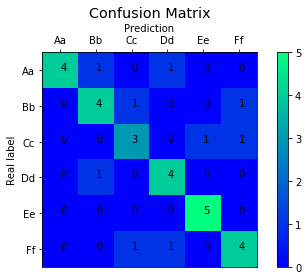

In [93]:
# Plot confusion matrix with matplotlib

def plot_confusion_matrix(confusion_matrix):
    # Let label of xticks go to top
    fig, ax = plt.subplots()
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.winter)
    plt.title('Confusion Matrix', fontsize='x-large')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    print(tick_marks)
    plt.xticks(tick_marks, classes)#, rotation=-45)
    plt.yticks(tick_marks, classes)


    iters = [[i,j] for i in range(len(classes)) for j in range(len(classes))]
    for i, j in iters:
        plt.text(j, i, format(confusion_matrix[i, j]))

    plt.ylabel('Real label')
    plt.xlabel('Prediction')
    plt.tight_layout()
    plt.show()

    
plot_confusion_matrix(confusion_matrix)

In [94]:
cm = confusion_matrix
sum = cm.numpy().sum(axis=1)
sum

array([6, 6, 5, 5, 5, 6])

In [95]:
sum[:, tf.newaxis]

array([[6],
       [6],
       [5],
       [5],
       [5],
       [6]])

tf.Tensor(
[[ 66.66666667  16.66666667   0.          16.66666667   0.
    0.        ]
 [  0.          66.66666667  16.66666667   0.           0.
   16.66666667]
 [  0.           0.          60.           0.          20.
   20.        ]
 [  0.          20.           0.          80.           0.
    0.        ]
 [  0.           0.           0.           0.         100.
    0.        ]
 [  0.           0.          16.66666667  16.66666667   0.
   66.66666667]], shape=(6, 6), dtype=float64)


Text(0.5, 1.0781824871228844, 'Confusion Matrix')

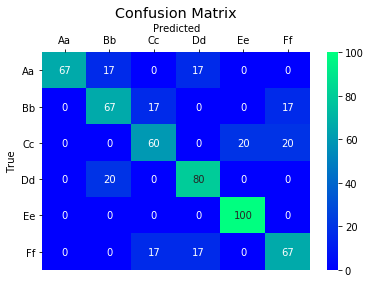

In [99]:
# Plot confusion matrix with seaborn
cm = confusion_matrix
cm = cm/cm.numpy().sum(axis=1)[:, tf.newaxis] # add formala to get new matrix value, * 100 for %
print(cm)

#set inner text scale
sns.set(font_scale=1.2)

# Let label of xticks go to top
fig, ax = plt.subplots()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

#set inner text scale, for inner of inner digits
sns.set(font_scale=1.4)

sns.heatmap(
    cm, annot=True,cmap=plt.cm.winter, # fmt='.0f', for %
    xticklabels=classes,
    yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")

# Let y-label also matching matplotlib
plt.yticks(rotation=0)
plt.title('Confusion Matrix', fontsize='x-large')